In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten
from tensorflow.keras.models import Model

In [3]:
data = tf.keras.datasets.fashion_mnist

(Xtrain , ytrain), (Xtest, ytest) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
Xtrain.shape

(60000, 28, 28)

In [5]:
Xtest.shape


(10000, 28, 28)

In [6]:
Xtrain = np.expand_dims(Xtrain,-1)
Xtest = np.expand_dims(Xtest,-1)

In [7]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
k = len(np.unique(ytrain))  #number of classes

In [9]:
#builiding the model using functional api

i = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),2,activation='relu')(i)
x = Conv2D(64,(3,3),2,activation='relu')(x)
x = Conv2D(128,(3,3),2,activation='relu')(x)
x = Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [12]:
r = model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest),epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7875 - accuracy: 0.7553 - val_loss: 0.4459 - val_accuracy: 0.8323
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4004 - accuracy: 0.8498 - val_loss: 0.4029 - val_accuracy: 0.8506
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3584 - accuracy: 0.8652 - val_loss: 0.3782 - val_accuracy: 0.8589
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3294 - accuracy: 0.8770 - val_loss: 0.3643 - val_accuracy: 0.8655
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3113 - accuracy: 0.8834 - val_loss: 0.3677 - val_accuracy: 0.8668
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2970 - accuracy: 0.8875 - val_loss: 0.3523 - val_accuracy: 0.8713
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2778 - accuracy: 0.8946 - val_loss: 0.3734 -

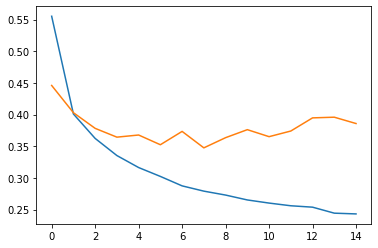

In [13]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [18]:
predictions = model.predict(Xtest).argmax(axis=1)

In [15]:
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'Real Values')

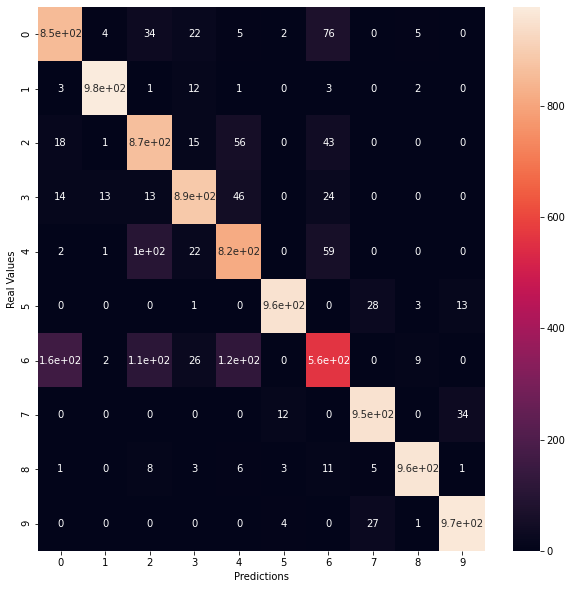

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(ytest,predictions),annot = True)
plt.xlabel('Predictions')
plt.ylabel('Real Values')

In [17]:

predictions

array([[1.03040007e-11, 4.30924529e-13, 3.93362345e-13, ...,
        4.69180086e-04, 1.84962157e-10, 9.99530554e-01],
       [2.56669159e-06, 2.16356644e-09, 9.83465672e-01, ...,
        1.78009224e-12, 1.64796958e-07, 7.91699673e-14],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.20891023e-25, 1.00000000e+00, 1.54147455e-30, ...,
        0.00000000e+00, 7.26770850e-29, 1.99576459e-33],
       [2.22396047e-05, 6.67061828e-09, 3.66962081e-06, ...,
        8.82524312e-01, 3.80869070e-03, 1.53192496e-02]], dtype=float32)